<a href="https://colab.research.google.com/github/Manash-Christ/ML-LABS/blob/main/2348528_lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [ ]:
df = df[['v1','v2']].rename({'v1':'y','v2':'x'},axis=1)

In [ ]:
#nullls
df.isnull().sum()

y    0
x    0
dtype: int64

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1007)>


False

In [ ]:
df.y.value_counts()

y
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['x'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

df['x'] = corpus
list = []
for i in df.x:
   list.append(len(i))

df['count'] = list
df

,y,x,count
0,ham,go jurong point crazi avail bugi n great world...,76
1,ham,ok lar joke wif u oni,21
2,spam,free entri wkli comp win fa cup final tkt st m...,99
3,ham,u dun say earli hor u c alreadi say,35
4,ham,nah think goe usf live around though,36
...,...,...,...
5567,spam,nd time tri contact u u pound prize claim easi...,78
5568,ham,b go esplanad fr home,21
5569,ham,piti mood suggest,17
5570,ham,guy bitch act like interest buy someth els nex...,65


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5572)
bag_of_words = cv.fit_transform(corpus).toarray()
bag_of_words

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
df['y']=df['y'].replace({'spam':1,'ham':0})

In [ ]:
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df.y, test_size = 0.20, random_state = 0)
X_test.shape

(1115, 5572)

In [ ]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

nm = NearMiss(sampling_strategy='majority', n_neighbors=3)
x_res, y_res = nm.fit_resample(X_train, y_train)

ov = SMOTE(sampling_strategy='minority', random_state=None, k_neighbors=5, n_jobs=None)
x_res1, y_res1 = ov.fit_resample(X_train, y_train)



In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_pred = pd.DataFrame(y_test)

spam_detect_model1 = MultinomialNB().fit(X_train, y_train)
spam_pred['imb']=spam_detect_model1.predict(X_test)

spam_detect_model2 = MultinomialNB().fit(x_res, y_res)
spam_pred['bal1']=spam_detect_model2.predict(X_test)

spam_detect_model3 = MultinomialNB().fit(x_res1, y_res1)
spam_pred['bal2']=spam_detect_model3.predict(X_test)

spam_pred

,y,imb,bal1,bal2
4456,0,0,0,0
690,0,0,0,0
944,0,0,0,0
3768,0,0,0,0
1189,0,0,0,0
...,...,...,...,...
2906,0,0,0,0
1270,0,0,0,0
3944,0,0,0,0
2124,0,0,0,0


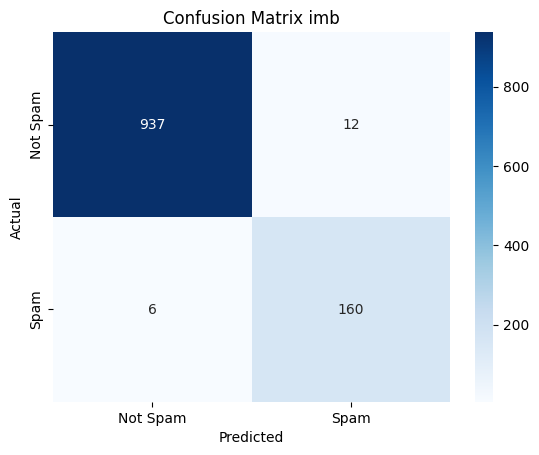

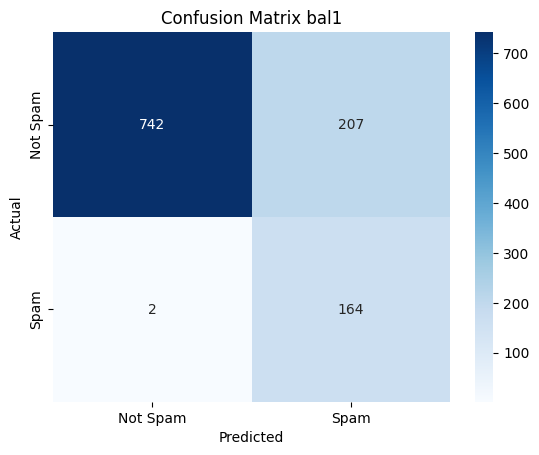

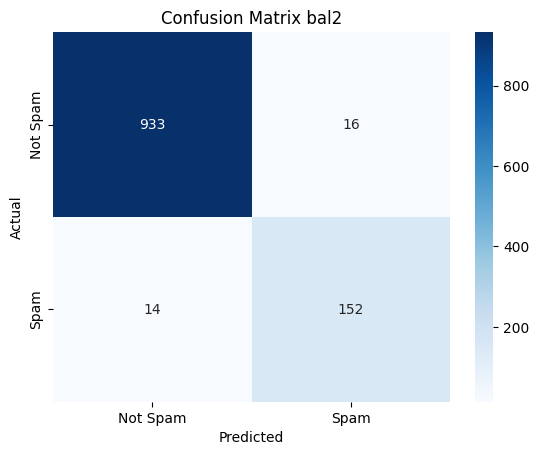

In [ ]:
from sklearn.metrics import confusion_matrix
for i in spam_pred.drop('y',axis=1):
    confusion_m = confusion_matrix(y_test,spam_pred[i])
    sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix {i}')
    plt.show()

In [ ]:
pred_prob = pd.DataFrame()
predicted_probs = spam_detect_model1.predict_proba(X_test)
predicted_probs = np.array([i.max() for i in predicted_probs])
pred_prob['van'] = predicted_probs

predicted_probs = spam_detect_model2.predict_proba(X_test)
predicted_probs = np.array([i.max() for i in predicted_probs])
pred_prob['bal1'] = predicted_probs

predicted_probs = spam_detect_model3.predict_proba(X_test)
predicted_probs = np.array([i.max() for i in predicted_probs])
pred_prob['bal2'] = predicted_probs

pred_prob

,van,bal1,bal2
0,1.000000,0.999989,1.000000
1,0.966710,0.815915,0.962154
2,0.999951,0.836635,1.000000
3,0.999998,0.945897,0.999999
4,0.998057,0.947910,0.999244
...,...,...,...
1110,0.932347,0.677969,0.833122
1111,1.000000,0.983699,1.000000
1112,0.999988,0.983065,0.999997
1113,1.000000,0.839247,1.000000


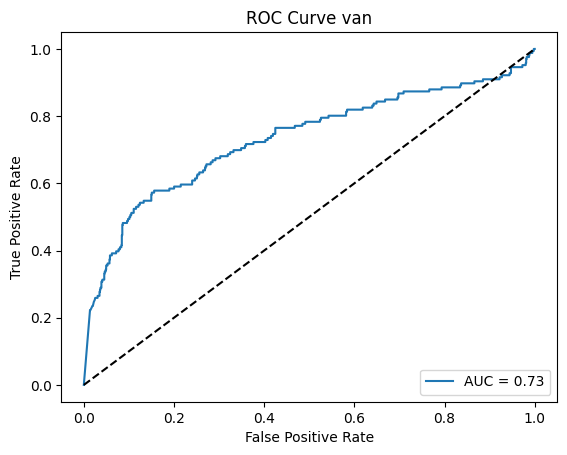

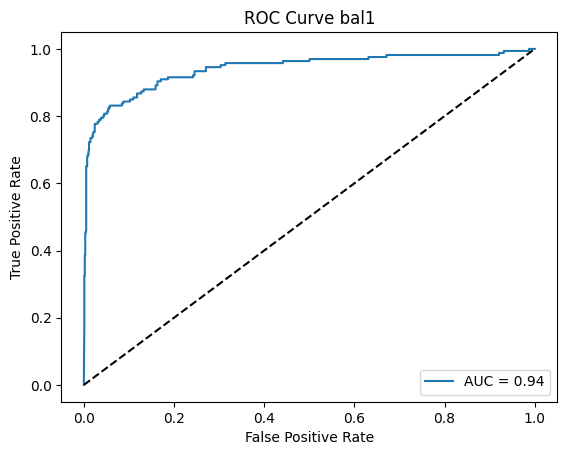

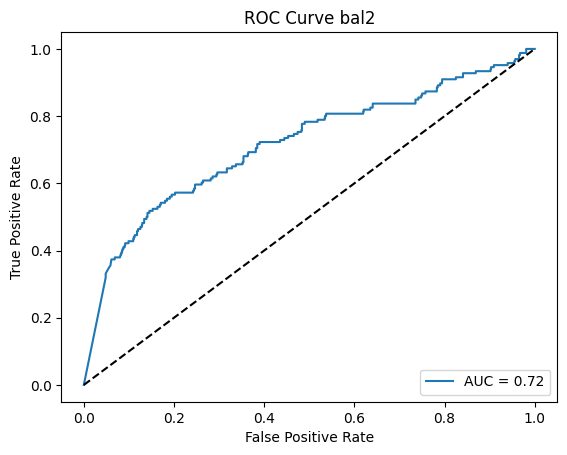

In [ ]:
from sklearn.metrics import roc_curve, auc


for i in pred_prob:
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[i])
    roc_auc = auc(fpr, tpr)

    # Plotting ROC curve
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve {i}')
    plt.legend(loc='lower right')
    plt.show()

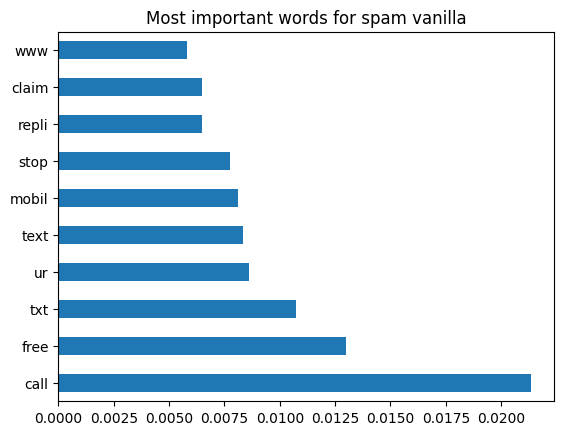

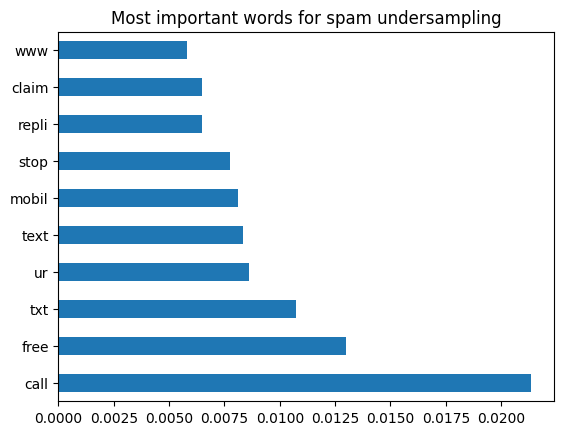

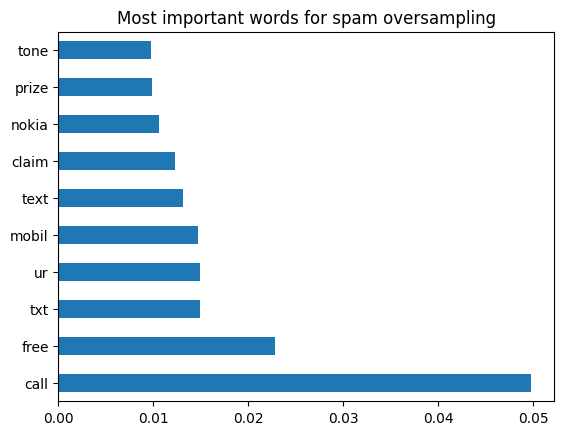

In [ ]:
feature_importances1 = np.e**(spam_detect_model1.feature_log_prob_)
words = cv.get_feature_names_out()
feat1 = pd.Series({k:i for k,i in zip(words,feature_importances1[1])})
feat1.sort_values(ascending=False)[:10].plot(kind='barh')
plt.title("Most important words for spam vanilla")
plt.show()

feature_importances1 = np.e**(spam_detect_model2.feature_log_prob_)
words = cv.get_feature_names_out()
feat1 = pd.Series({k:i for k,i in zip(words,feature_importances1[1])})
feat1.sort_values(ascending=False)[:10].plot(kind='barh')
plt.title("Most important words for spam undersampling")

plt.show()
feature_importances1 = np.e**(spam_detect_model3.feature_log_prob_)
words = cv.get_feature_names_out()
feat1 = pd.Series({k:i for k,i in zip(words,feature_importances1[1])})
feat1.sort_values(ascending=False)[:10].plot(kind='barh')
plt.title("Most important words for spam oversampling")

plt.show()

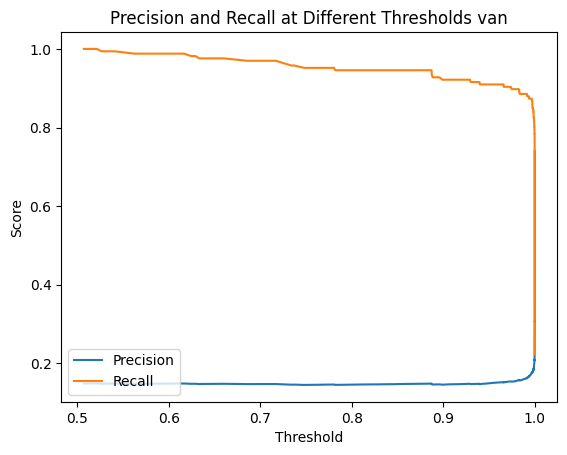

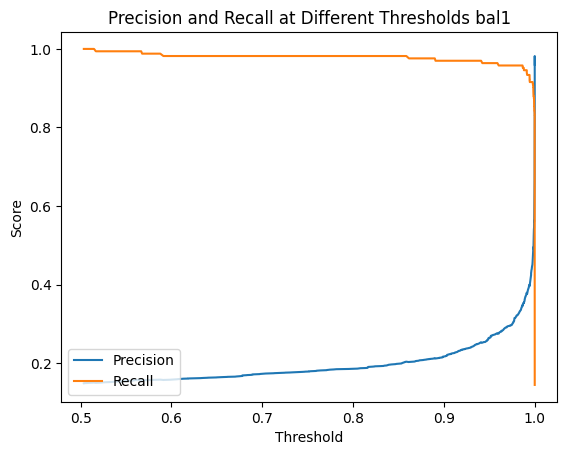

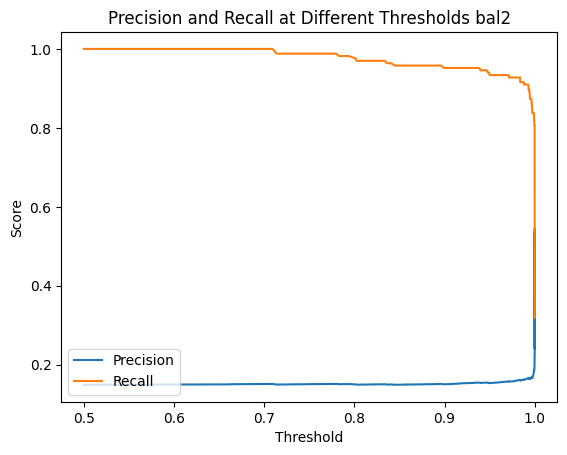

In [ ]:
from sklearn.metrics import precision_recall_curve

for i in pred_prob:
    precision, recall, thresholds = precision_recall_curve(y_test, pred_prob[i])
    plt.plot(thresholds, precision[:-1], label='Precision')
    plt.plot(thresholds, recall[:-1], label='Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title(f'Precision and Recall at Different Thresholds {i}')
    plt.legend(loc='lower left')
    plt.show()